In [28]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets
from PIL import Image
import seaborn as sns

In [10]:
# Let's unzip our dataset
# !sudo apt-get install p7zip-full
# Replace "Animals.7z" with the name of your 7z file
# !7z x Animals.7z -o/content/extracted/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 27537575 bytes (27 MiB)

Extracting archive: Animals.7z
--
Path = Animals.7z
Type = 7z
Physical Size = 27537575
Headers Size = 29786
Method = LZMA2:24
Solid = +
Blocks = 1

  0%     11% 5       22% 265 - Animals/chickens/53.jpeg                                    34% 509 - Animals/cows/OIP--c6Kv6abukQvmc3gYdKvLwHaFS.jpeg                                                            41% 675 - Animals/cows/OIP-5nLYVqozX86JvFZLT2LuCgHaEr.jpeg                  

In [12]:
# Path
path = Path("Animals")
fls = get_image_files(path)
failed = verify_images(path) # verify images
failed

'PosixPath' object is not iterable


(#0) []

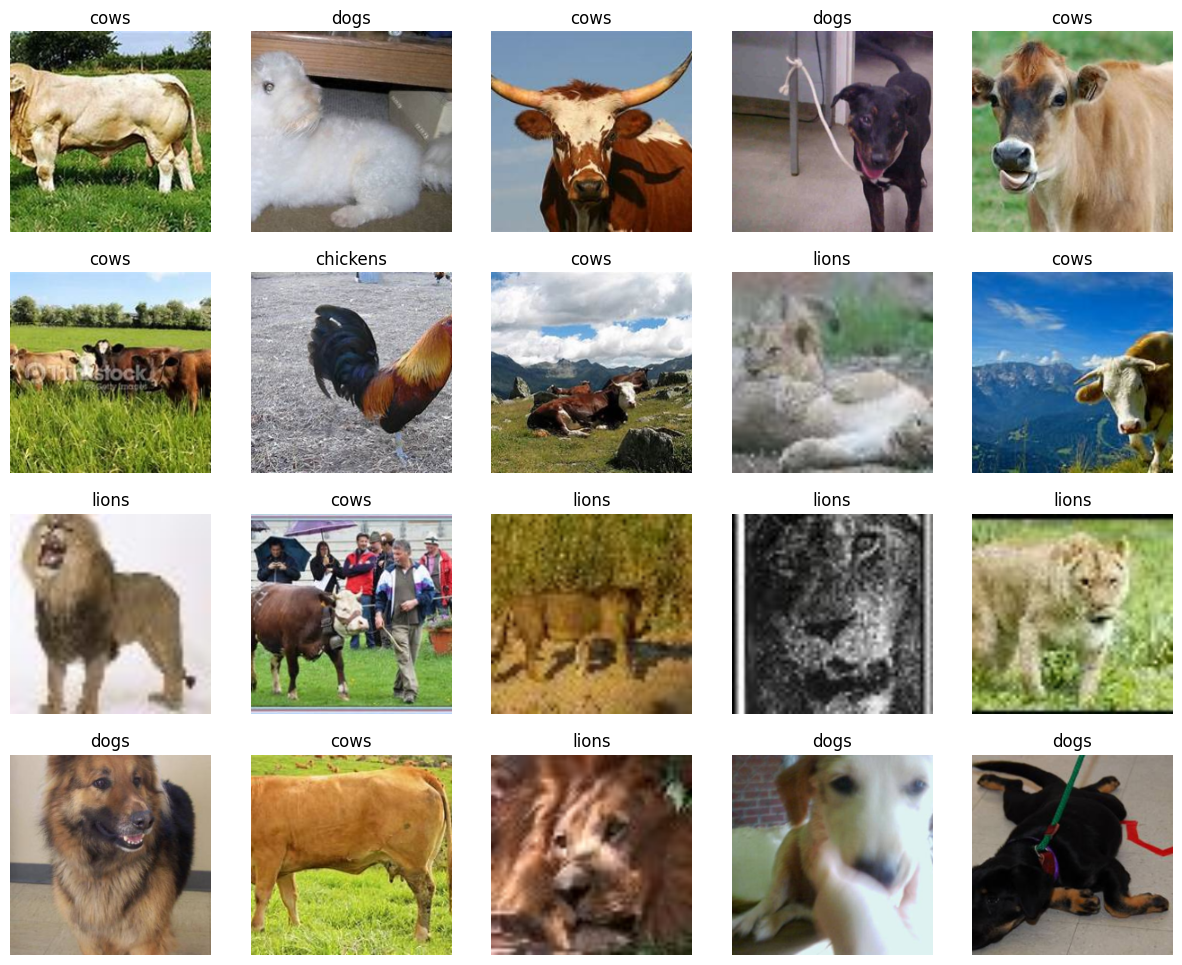

In [13]:
# Create DataBlock
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=30),
    get_y = parent_label,
    item_tfms=Resize(224)
)

# Data loader
dls = animals.dataloaders(path)

# check dataset
dls.train.show_batch(max_n=20, nrows=4)

In [14]:
# Learn & Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 168MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.628073,0.027942,0.992500,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.040236,0.017860,0.995000,00:09
1,0.033814,0.005533,0.997500,00:09
2,0.024285,0.002224,1.000000,00:09


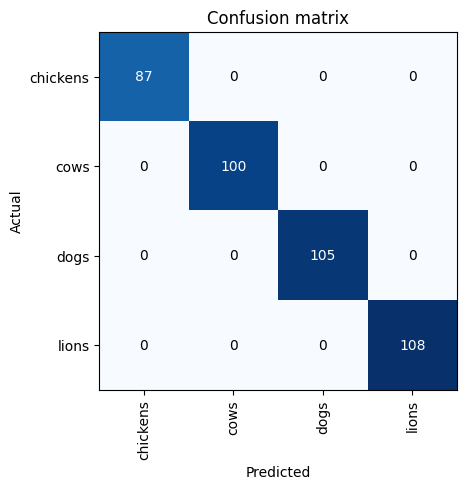

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

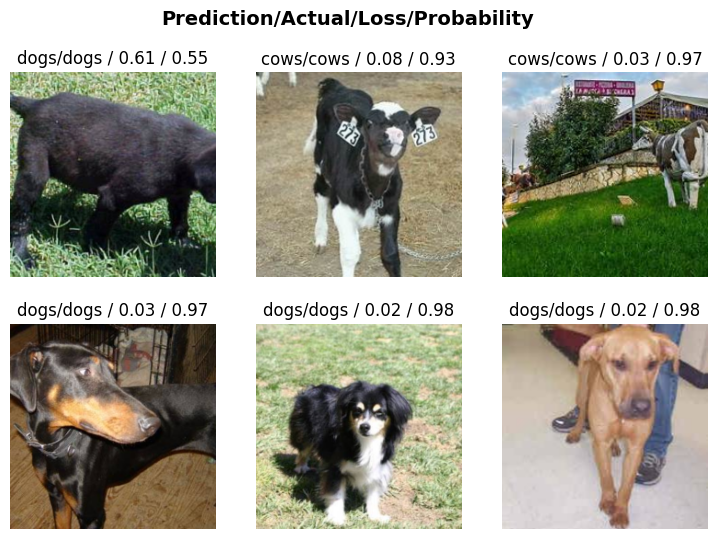

In [17]:
# Top Losses
interp.plot_top_losses(6, nrows=2)

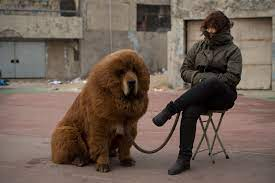

In [18]:
# Check the model manually
test1 = Image.open("/content/Testing/1_test.jpg")
test2 = Image.open("/content/Testing/2_test.jpg")
test1

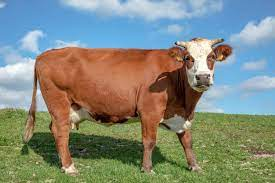

In [19]:
test2

In [20]:
def predict_pic(img):
  pred, pred_id, probs = learn.predict(img)
  print(f"Prediction: {pred}")
  print(f"Probability: {probs[pred_id]*100:.1f}%")

predict_pic(test1)
predict_pic(test2)

Prediction: lions
Probability: 62.6%


Prediction: cows
Probability: 100.0%


### Summary
If even first picture looks like a line it is actually dog. Let's plot the percents.

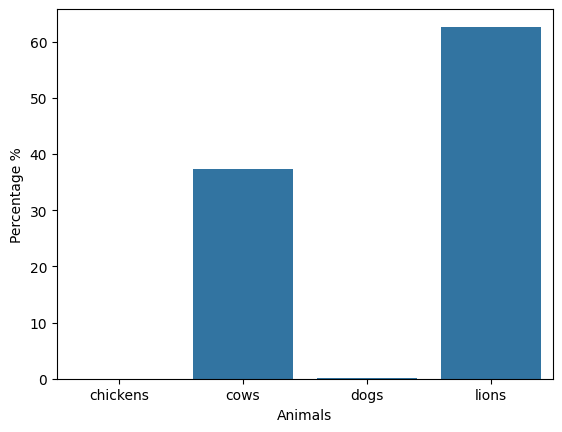

In [29]:
pred, pred_id, probs = learn.predict(test1)
sns.barplot(x=learn.dls.vocab, y=probs*100)
plt.ylabel('Percentage %')
plt.xlabel('Animals')
plt.show()

In [30]:
# Saving model as pkl for deploying
torch.save(learn, 'animals_cls.pkl')